In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [5]:
cc.v_grid

array([137.3435471 ,   0.        ,  95.10859144, 127.10426   ,
        40.9670011 , 134.80587661,  12.82025027,  70.35473256,
       113.9857852 , 136.7105306 ,   3.43506492,  83.44436963,
       105.28654418, 121.24316186,  56.04074958,  26.04503977,
       131.61289287, 137.18538075,   0.87478737,  89.46070282,
       100.38390572, 124.34538677,  48.55483313,  33.40685392,
       129.52513122, 133.37189312,  19.09693417,  63.32980124,
       117.79190471, 109.81908156,  77.06959339])

In [2]:
from ContinuousContract_Tasmanian import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

(31,)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 200 but corresponding boolean dimension is 31

In [6]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

(3, 200, 5, 4, 1, 1.0, 1.0, 1.0, 0.85, 0.25, 1.0)


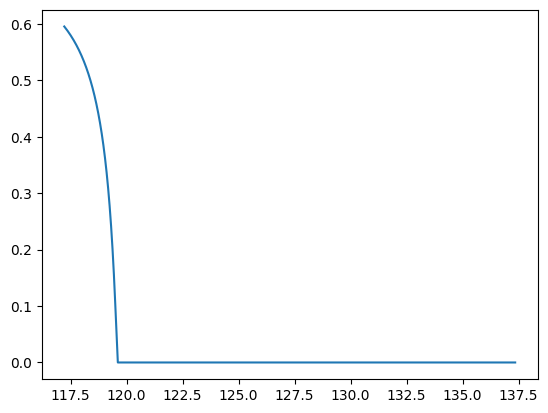

In [7]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

In [8]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

Tring to apply Tasmanian to the already evaluated J using interpolations.
Note: in the ideal Tasmanian scenario, I would instead directly evaluate J at the points suggested by Tasmanian! This would be essentially an endogenous grid method

In [71]:
from scipy.interpolate import RegularGridInterpolator

vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid, mwc_Rho.Q_grid), J, bounds_error=False, fill_value=None) (po) for po in points])


In [10]:
import Tasmanian

In [13]:
print(Tasmanian.__version__)

8.1


In [57]:
dim = 1
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja")

points = grid[1].getPoints()

In [59]:
sorted_indices = np.argsort(points[:, 0])  # for a 1D example
points_sorted = points[sorted_indices]
values_sorted = original_values[sorted_indices]


In [63]:
sorted_indices[25]

0

In [64]:
inverse_indices[sorted_indices]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [60]:
# Create an inverse mapping from sorted indices back to original
inverse_indices = np.zeros_like(sorted_indices)
inverse_indices[sorted_indices] = np.arange(len(sorted_indices))

# Use inverse_indices to rearrange the updated values back to the original order
updated_values = updated_values_sorted[inverse_indices]


NameError: name 'updated_values_sorted' is not defined

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import RegularGridInterpolator

J = objects['mwc_Rho_J']
W = objects['mwc_Rho_W']

J = J[p.z_0-1,...,0]

# Create a global sparse grid
dim = 3
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja", anisotropic_weights)
#Good methods: "clenshaw-curtis", rleja" maybe?, "gauss-patterson" kinda overdoes it, "leja" is good but requires higher depth (like 10)... still not many points though!


a = (mwc_Rho.N_grid[0]+1e-10,mwc_Rho.N_grid1[0]+1e-10,mwc_Rho.rho_grid[0]+1e-10)
b = (mwc_Rho.N_grid[-1]-1e-10,mwc_Rho.N_grid1[-1]-1e-10,mwc_Rho.rho_grid[-1]-1e-10)
grid[1].setDomainTransform(np.column_stack((a, b)))
# Get the points where Tasmanian wants J evaluated
points = grid[1].getPoints()  # shape = (N,4)
print ("Number of points", points.shape[0])

# Evaluate J at these points (our "given" data)
vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid), J, bounds_error=False, fill_value=None) (po) for po in points])

# Load these values into the Tasmanian grid
grid[1].loadNeededPoints(vals)

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
j= 0
s= 1
fixed_x0 = mwc_Rho.N_grid[j]
fixed_x1 = mwc_Rho.N_grid1[s]


# Create a range of points along x_2
x2_values = mwc_Rho.rho_grid[1:-2]
plot_points = np.zeros((197,3))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values


# Evaluate original function J at these slice points
original_values = np.array([J[j,s,1:-2]])[0,:]

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid[1].evaluateBatch(plot_points)[:,0]

Number of points 1729


In [3]:
vals.shape

NameError: name 'vals' is not defined

In [17]:
fitted_values.shape

(197,)

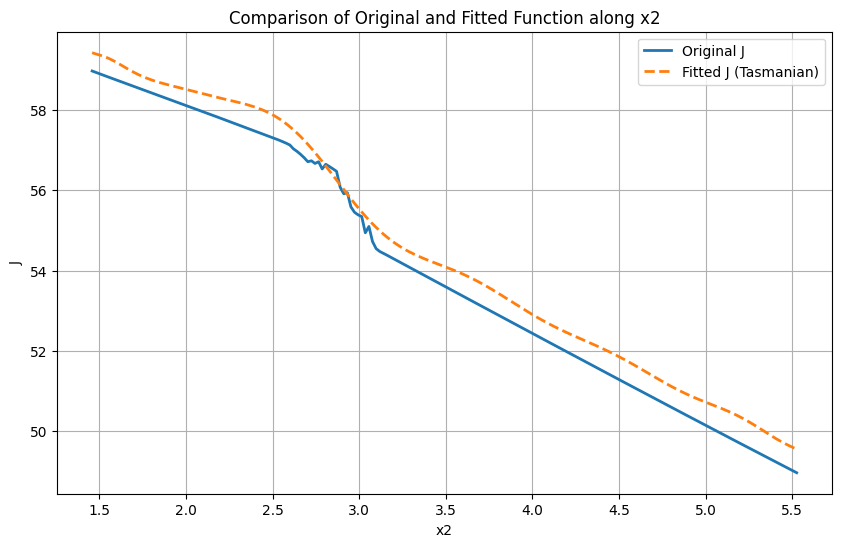

In [21]:
# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
j=0
s=0
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

tas_derivatives = []
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] #Derivative around coordinate 1
    tas_derivatives.append(dJdx1)

NameError: name 'deriv_points' is not defined

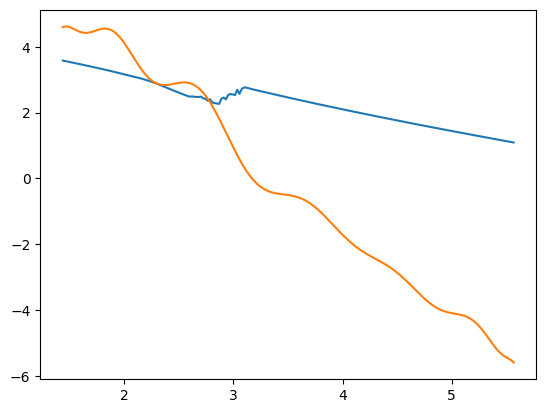

In [32]:
plt.plot(mwc_Rho.rho_grid,(J[j,3,:]-J[j,1,:])/2)
plt.plot(mwc_Rho.rho_grid,tas_derivatives)

In [207]:
test_points = (mwc_Rho.N_grid,mwc_Rho.N_grid1,mwc_Rho.rho_grid) # some test points for derivative


In [210]:
mwc_Rho.N_grid1.shape[0]

5

In [237]:
jac[1]

2.3687907119042744

In [233]:
(J[j,4,v]-J[j,2,v])/2

3.8372424078120986

In [218]:
mwc_Rho.N_grid1[1:-1]

array([1., 2., 3.])

In [30]:
#Getting derivatives around the original J values
# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = mwc_Rho.rho_grid# some test points for derivative

deriv_points = np.zeros((mwc_Rho.rho_grid.shape[0],3))
j=2
s=2
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += 1
    x_backward[dim] -= 1
    return (f[x_forward] - f[x_backward]) / (2)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J[j,:,v], pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference: {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


IndexError: arrays used as indices must be of integer (or boolean) type

Basic example

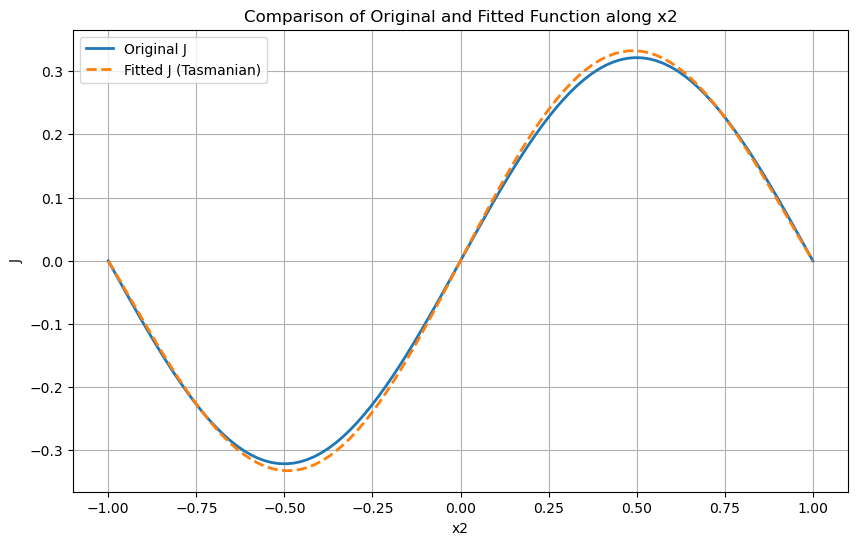

Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) 
---------------------------------------------------------------------
-0.800	+0.15936975	+0.20301242	+0.15574745
-0.720	+0.16197897	+0.22877791	+0.15778802
-0.640	+0.16053042	+0.24418361	+0.15592613
-0.560	+0.15461715	+0.24837205	+0.14979996
-0.480	+0.14402709	+0.24093288	+0.13923148
-0.400	+0.12877669	+0.22201060	+0.12425586
-0.320	+0.10912961	+0.19234678	+0.10513712
-0.240	+0.08559734	+0.15326637	+0.08236740
-0.160	+0.05892050	+0.10661701	+0.05664885
-0.080	+0.03003135	+0.05467114	+0.02885873
+0.000	+0.00000000	+0.00000000	+0.00000000
+0.080	-0.03003135	-0.05467114	-0.02885873
+0.160	-0.05892050	-0.10661701	-0.05664885
+0.240	-0.08559734	-0.15326637	-0.08236740
+0.320	-0.10912961	-0.19234678	-0.10513712
+0.400	-0.12877669	-0.22201060	-0.12425586
+0.480	-0.14402709	-0.24093288	-0.13923148
+0.560	-0.15461715	-0.24837205	-0.14979996
+0.640	-0.16053042	-0.24418361	-0.15592613
+0.720	-0.16197897	-0.22877791	-0.15778802

In [89]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
import time

# Define the 5D test function J
# J(x0,x1,x2,x3,x4) = exp(-x0^2 - x1^2)* sin(pi*x2)* cos(pi*x3) * (1 + x4^2)
def J(x):
    return (np.exp(-x[0]**2 - x[1]**2) 
            * np.sin(np.pi*x[2]) 
            * np.cos(np.pi*x[3]) 
            * (1.0 + x[4]**2))

# Let's pick which dimension to slice and which to differentiate:
# - We'll plot along x_2 (dimension=2), fixing x_0,x_1,x_3,x_4.
# - We'll differentiate along x_1 (dimension=1).

# Create a global sparse grid
dim = 5
outputs = 1
depth = 5
grid = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid.makeGlobalGrid(dim, outputs, depth, "level", "clenshaw-curtis")

# Get the points where Tasmanian wants J evaluated
points = grid.getPoints()  # shape = (N,5)

# Evaluate J at these points (our "given" data)
vals = np.array([[J(p)] for p in points])

# Load these values into the Tasmanian grid
grid.loadNeededPoints(vals)

# Now we have a fitted surrogate model using Tasmanian.

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
fixed_x0 = 0.0
fixed_x1 = 0.0
fixed_x3 = 0.4
fixed_x4 = -0.2

# Create a range of points along x_2
x2_values = np.linspace(-1, 1, 100)
plot_points = np.zeros((100,5))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values
plot_points[:,3] = fixed_x3
plot_points[:,4] = fixed_x4

# Evaluate original function J at these slice points
original_values = np.array([J(pt) for pt in plot_points])

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid.evaluateBatch(plot_points)[:,0]

# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = np.linspace(-0.8, 0.8, 21) # some test points for derivative
deriv_points = np.zeros((21,5))
deriv_points[:,0] = fixed_x0
deriv_points[:,1] = test_points  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = 0.2   # fix other dimensions
deriv_points[:,3] = fixed_x3
deriv_points[:,4] = fixed_x4

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += h
    x_backward[dim] -= h
    return (f(x_forward) - f(x_backward)) / (2.0*h)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_original = []
start_fd_orig = time.perf_counter()
for pt in deriv_points:
    fd_original.append(finite_diff_derivative(J, pt, dim=1))
end_fd_orig = time.perf_counter()
fd_orig_time = end_fd_orig - start_fd_orig
fd_original = np.array(fd_original)

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J, pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, fd_original, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{fd_orig_val:+1.8f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (original): {fd_orig_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (fitted): {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


Testing derivative speed: Tasmanian vs Finite Diff

In [77]:
import numpy as np
import Tasmanian

def f(x):
    # f(x) = sin(x)*exp(-x^2)
    return np.sin(x[0]) * np.exp(-x[0]**2)

def fprime(x):
    # f'(x) = cos(x)*exp(-x^2) - 2x*sin(x)*exp(-x^2)
    return (np.cos(x[0])*np.exp(-x[0]**2)) - (2*x[0]*np.sin(x[0])*np.exp(-x[0]**2))

# Create a global sparse grid
grid = Tasmanian.TasmanianSparseGrid()
grid.makeGlobalGrid(1, 1, 5, "level", "gauss-legendre")

# Get the points and load function values
interp_points = grid.getPoints()
vals = np.array([[f(pt)] for pt in interp_points])
grid.loadNeededPoints(vals)

# Points at which to differentiate
test_points = np.linspace(-1.0, 1.0, 11).reshape((11, 1))

approx_derivatives = []
for p in test_points:
    # Ensure p is passed as a simple list/array of floats
    x_list = p[0]  # Convert to a simple Python list with one element
    jac = grid.differentiate(x_list)
    # If jac is scalar, just append jac directly
    # If it's an array, you'd do jac[0], but likely it's scalar
    approx_derivatives.append(jac)

approx_derivatives = np.array(approx_derivatives)

exact_derivatives = np.array([fprime(p) for p in test_points])

print("x\t\tExact Derivative\tApprox Derivative\tError")
print("-------------------------------------------------------------")
for i, p in enumerate(test_points):
    approx = approx_derivatives[i]
    exact = exact_derivatives[i]
    error = abs(exact - approx)/abs(exact)
    print(f"{p[0]:+1.4f}\t{exact:+1.8f}\t{approx:+1.8f}\t{error:+1.8f}")


x		Exact Derivative	Approx Derivative	Error
-------------------------------------------------------------
-1.0000	-0.42035364	-0.22111074	+0.47398875
-0.8000	-0.23784212	-0.25215458	+0.06017632
-0.6000	+0.10309190	+0.08867878	+0.13980841
-0.4000	+0.51940407	+0.52765542	+0.01588620
-0.2000	+0.86528586	+0.86925111	+0.00458258
+0.0000	+1.00000000	+0.99615128	+0.00384872
+0.2000	+0.86528586	+0.86925111	+0.00458258
+0.4000	+0.51940407	+0.52765542	+0.01588620
+0.6000	+0.10309190	+0.08867878	+0.13980841
+0.8000	-0.23784212	-0.25215458	+0.06017632
+1.0000	-0.42035364	-0.22111074	+0.47398875


## Older stuff: Spline fitting

In [ ]:
from scipy.interpolate import UnivariateSpline

# Spline Fitting
def fit_spline(W, J1, smoothness=0):
    """
    Fit a Univariate Spline to the data.

    Parameters:
    - W: Input grid points.
    - J1: Observed values at grid points.
    - smoothness: Smoothing factor. Larger values result in smoother fits.
      Default of 0 results in an interpolating spline.

    Returns:
    - spline: Fitted spline object.
    """
    spline = UnivariateSpline(W, J1, s=smoothness)
    return spline

# Fit the spline (adjust smoothness if needed)
smoothness_factor = 0.1  # Adjust this based on your needs
spline = fit_spline(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], smoothness=smoothness_factor)

In [ ]:
# Evaluate the spline over a fine grid
W_fine = np.linspace(mwc_Rho_W[2,2,2,:,0,1].min(), mwc_Rho_W[2,2,2,:,0,1].max(), 500)
J1_spline = spline(W_fine)

# Plot the Results
plt.figure(figsize=(8, 5))
plt.scatter(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], label="Observed Data", color="blue", alpha=0.7)
#plt.plot(W_fine, true_function, label="True Function (Ground Truth)", color="green", linestyle="--")
plt.plot(W_fine, J1_spline, label="Spline Approximation", color="red")
plt.xlabel("W")
plt.ylabel("J1")
plt.title("Spline Fitting to Capture Concavity")
plt.legend()
plt.show()

# Access Spline Derivatives
first_derivative = spline.derivative(n=1)(W_fine)  # First derivative
delta_second_derivative = spline.derivative(n=2)(W_fine)  # Second derivative